In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy import stats
plt.style.use("ggplot")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading data
data = pd.read_csv("../data/data.csv",header=0)

In [4]:
# Exploring the data
data.shape

(569, 33)

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Dropping unwanted columns
data = data.drop(['Unnamed: 32','id'],axis = 1)

In [8]:
# Confirming dropped columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Number of Benign:  357
Number of Malignant :  212


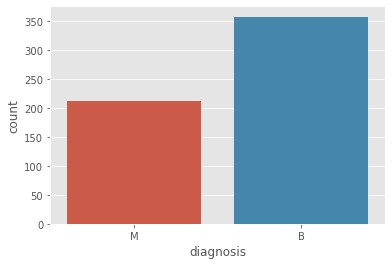

In [9]:
# Bar graph to show the diagnosis
y = data.diagnosis
ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

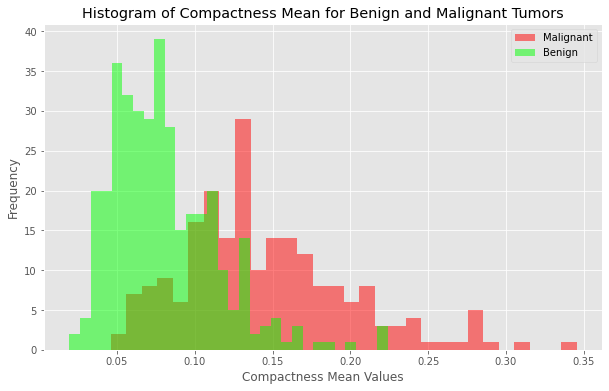

Most frequent malignant compactness mean is:  0.12587666666666666


In [10]:
plt.figure(figsize=(10, 6))
M = plt.hist(data[data["diagnosis"] == "M"].compactness_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
B = plt.hist(data[data["diagnosis"] == "B"].compactness_mean,bins=30,fc = (0,1,0,0.5),label = "Benign")
plt.legend()
plt.xlabel("Compactness Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Compactness Mean for Benign and Malignant Tumors")
plt.show()
frequent_malignant_compactness_mean = M[0].max()
index_frequent_malignant_compactness_mean = list(M[0]).index(frequent_malignant_compactness_mean)
most_frequent_malignant_compactness_mean = M[1][index_frequent_malignant_compactness_mean]
print("Most frequent malignant compactness mean is: ",most_frequent_malignant_compactness_mean)

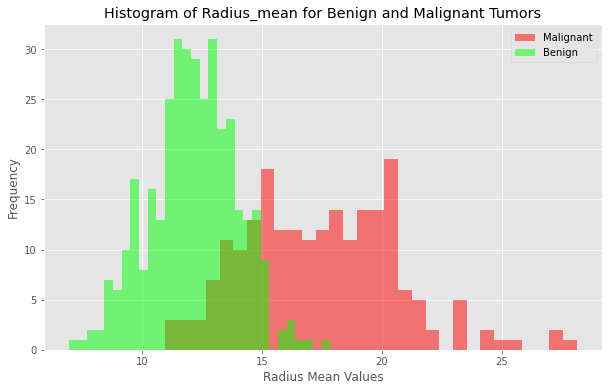

Most frequent malignant radius mean is:  20.101999999999997


In [11]:
plt.figure(figsize=(10, 6))
M = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
B = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Benign")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius_mean for Benign and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = M[0].max()
index_frequent_malignant_radius_mean = list(M[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = M[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

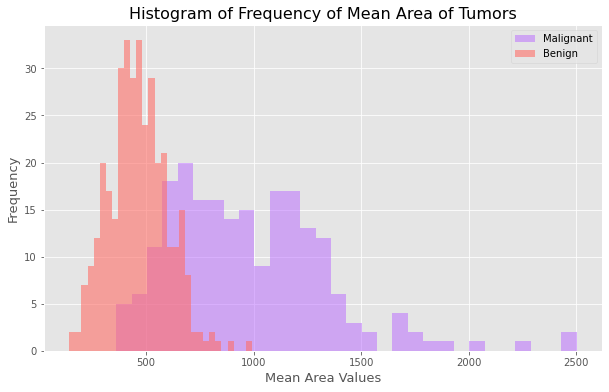

The Maximum Mean Area for Malignant Tumor is 20.0
The Maximum Mean Area for Benign Tumor is 33.0


In [12]:
plt.figure(figsize=(10, 6))
M = plt.hist(data[data.diagnosis == 'M'].area_mean, bins=30, label='Malignant', alpha=0.5, color='#b967ff')
B = plt.hist(data[data.diagnosis == 'B'].area_mean, bins=30, label='Benign', alpha=0.6, color='#ff6f69')
plt.legend()
plt.xlabel('Mean Area Values', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Histogram of Frequency of Mean Area of Tumors', fontsize=16)
plt.show()

# Calculating the maximum mean area of malignant and benign tumors

print('The Maximum Mean Area for Malignant Tumor is',M[0].max())
print('The Maximum Mean Area for Benign Tumor is',B[0].max())

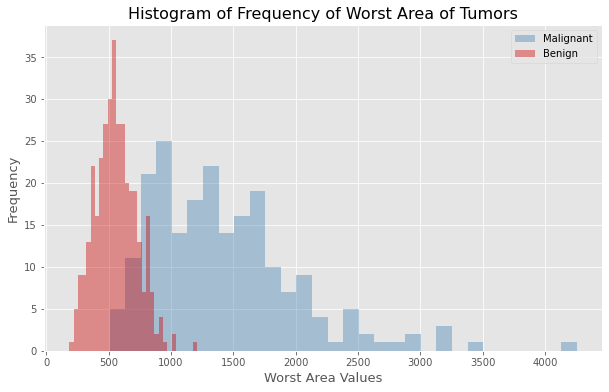

The Maximum Worst Area for Malignant Tumor is 25.0
The Maximum Worst Area for Benign Tumor is 37.0


In [13]:
plt.figure(figsize=(10, 6))
M = plt.hist(data[data.diagnosis == 'M'].area_worst, bins=30, label='Malignant', alpha=0.4, color='#4682b4')
B = plt.hist(data[data.diagnosis == 'B'].area_worst, bins=30, label='Benign', alpha=0.4, color='#cc0000')
plt.legend()
plt.xlabel('Worst Area Values', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Histogram of Frequency of Worst Area of Tumors', fontsize=16)
plt.show()

# Calculating the maximum mean area of malignant and benign tumors

print('The Maximum Worst Area for Malignant Tumor is',M[0].max())
print('The Maximum Worst Area for Benign Tumor is',B[0].max())

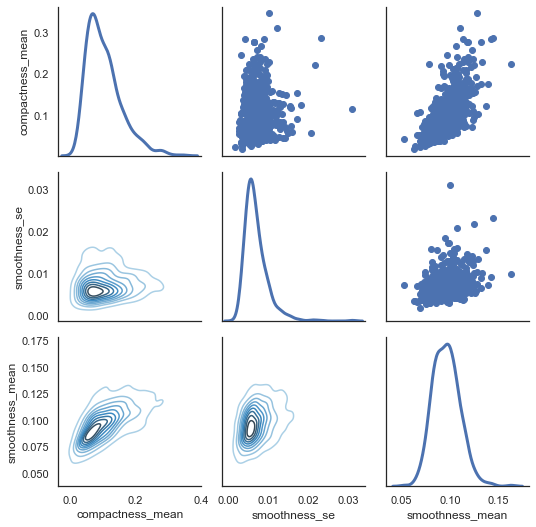

In [14]:
# Checking relationship between more than 2 distribution
sns.set(style = "white")
df = data.loc[:,["compactness_mean","smoothness_se","smoothness_mean"]]
g = sns.PairGrid(df,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()

In [15]:
# Checking for missing values
data.isna()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# Deriving further insights from the data
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [17]:
# Detecting outliers
data_benign = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc = data_benign.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data_benign[data_benign.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_benign[(data_benign.radius_mean < lower_bound) | (data_benign.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


In [18]:
# Box plot to show outliers
def plot_outlier(data,columns,title):
    melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = columns)
    plt.figure(figsize = (15,10))
    sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
    plt.show()

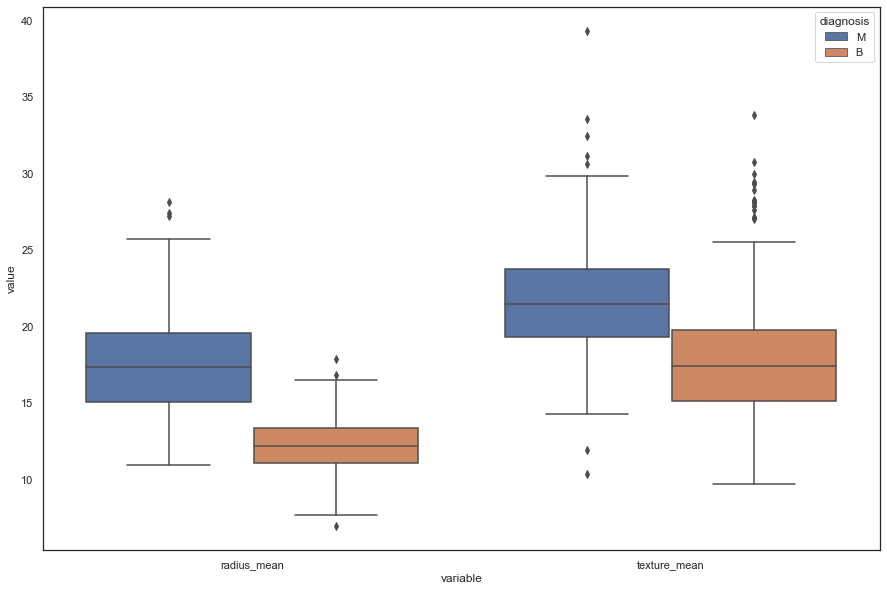

In [19]:
columns = ['radius_mean', 'texture_mean']
plot_outlier(data,columns,'Outliers in texture_mean and radius_mean \n')

In [20]:
# Fixing the outliers function

def fix_outlier(data):
    column_name=list(data.columns[2:])
    for i in column_name:
        upper_quartile=data[i].quantile(0.75)
        lower_quartile=data[i].quantile(0.25)
        data[i]=np.where(data[i]>upper_quartile,data[i].median(),np.where(data[i]<lower_quartile,data[i].median(),data[i]))
    return data

data_clean = fix_outlier(data)

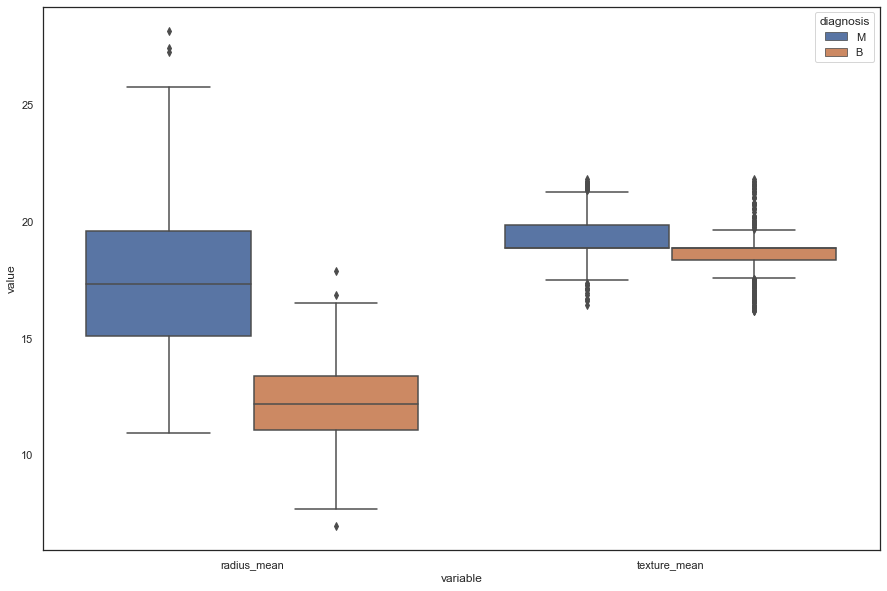

In [21]:
plot_outlier(data_clean,columns, 'Outliers in texture_mean and radius_mean \n')

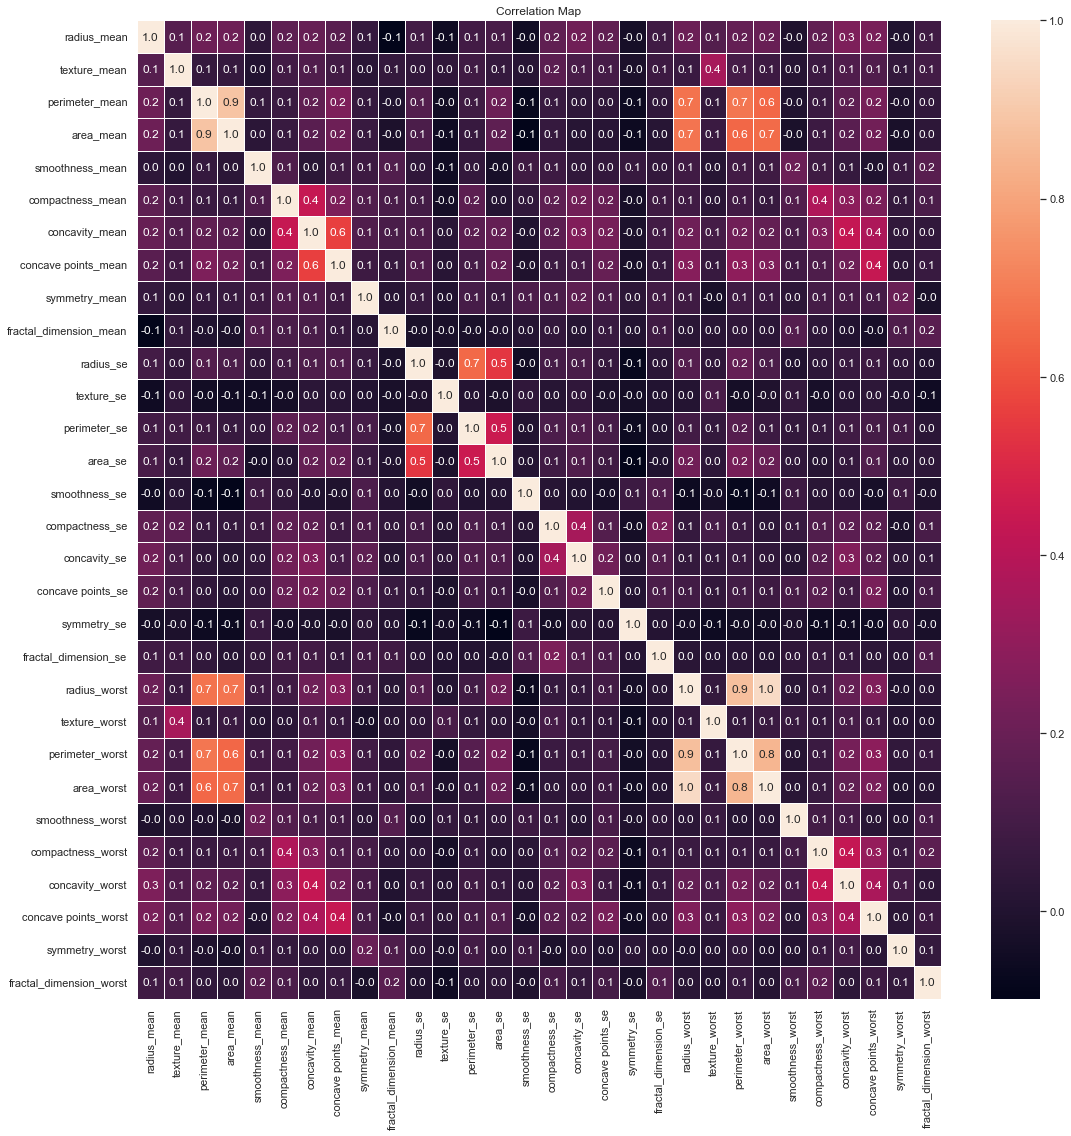

In [22]:
# Correlation heatmap
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('../charts/')
plt.show()

In [23]:
def encoding_data(data):
  for column in data.columns:
    if data[column].dtype == np.int64 or data[column].dtype == np.float64:
      continue
    data[column] = LabelEncoder().fit_transform(data[column])
  
  return data

In [24]:
encoded_df = df.copy()
encoding_data(encoded_df)

,compactness_mean,smoothness_se,smoothness_mean
0,0.27760,0.006399,0.11840
1,0.07864,0.005225,0.08474
2,0.15990,0.006150,0.10960
3,0.28390,0.009110,0.14250
4,0.13280,0.011490,0.10030
...,...,...,...
564,0.11590,0.010300,0.11100
565,0.10340,0.005769,0.09780
566,0.10230,0.005903,0.08455
567,0.27700,0.006522,0.11780


In [25]:
# Scaling data
def scaler(data):
    data_new = (data-data.min())/(data.max()-data.min())
    return data_new

In [26]:
# Sample of scaled data
encoded_data_clean = encoding_data(data_clean)
scaled_data = scaler(encoded_data_clean)
scaled_data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.474245,0.382648,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,...,0.3391,0.501157,0.328167,0.301037,0.500000,0.337155,0.418033,0.362807,0.471111,0.416101
1,1.0,0.643144,0.284192,0.382648,0.360927,0.501849,0.209530,0.566937,0.928665,0.571006,...,0.3391,0.269676,0.328167,0.301037,0.244898,0.205315,0.473547,0.362807,0.364444,0.851600
2,1.0,0.601496,0.902309,0.382648,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,...,0.3391,0.515046,0.328167,0.301037,0.945578,0.337155,0.418033,0.362807,0.471111,0.781765


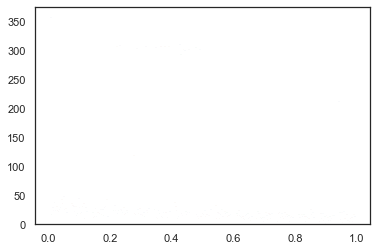

In [27]:
# Showing graphically
count, bins, ignored = plt.hist(scaled_data, 15)
plt.show()

In [28]:
new_data = scaled_data
new_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.474245,0.382648,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,...,0.33910,0.501157,0.328167,0.301037,0.500000,0.337155,0.418033,0.362807,0.471111,0.416101
1,1.0,0.643144,0.284192,0.382648,0.360927,0.501849,0.209530,0.566937,0.928665,0.571006,...,0.33910,0.269676,0.328167,0.301037,0.244898,0.205315,0.473547,0.362807,0.364444,0.851600
2,1.0,0.601496,0.902309,0.382648,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,...,0.33910,0.515046,0.328167,0.301037,0.945578,0.337155,0.418033,0.362807,0.471111,0.781765
3,1.0,0.210090,0.747780,0.083305,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,...,0.32872,0.627315,0.357472,0.092140,0.500000,0.337155,0.418033,0.362807,0.471111,0.416101
4,1.0,0.629893,0.474245,0.382648,0.360927,0.735869,0.423183,0.316195,0.245670,0.562130,...,0.33910,0.501157,0.328167,0.301037,0.707483,0.301199,0.418033,0.362807,0.471111,0.258002


In [29]:
# Fitting a RandomForest classifier
X = new_data.drop(["diagnosis"], axis=1)
y = new_data["diagnosis"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.2, random_state=10
)

In [31]:
classifier = RandomForestClassifier(n_estimators=100)

In [32]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
# Checking accuracy score
print ('Accuracy Score of the random forest regressor is :',accuracy_score(y_test, y_pred))

Accuracy Score of the random forest regressor is : 0.9385964912280702


In [35]:
# Checking feature importance
importances = classifier.feature_importances_
labels = X.columns
feature_data = pd.DataFrame(list(zip(labels, importances)), columns=["feature", "importance"])
feature_data = feature_data.sort_values(by='importance', ascending=False, )
significant_features_data = feature_data.head(10)
significant_features_data.shape
significant_features_data.head()

,feature,importance
0,radius_mean,0.342362
23,area_worst,0.059081
20,radius_worst,0.056625
22,perimeter_worst,0.053634
27,concave points_worst,0.053145


In [36]:
def plot_bar(df,title,save_as):
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x="importance", y="feature", data=df)
    ax.set_xlabel('Importance', fontsize=20)
    ax.set_ylabel('Feature', fontsize=20)
    ax.set_title(title, fontsize=30)
    plt.savefig('../charts/'+save_as)
    plt.show()

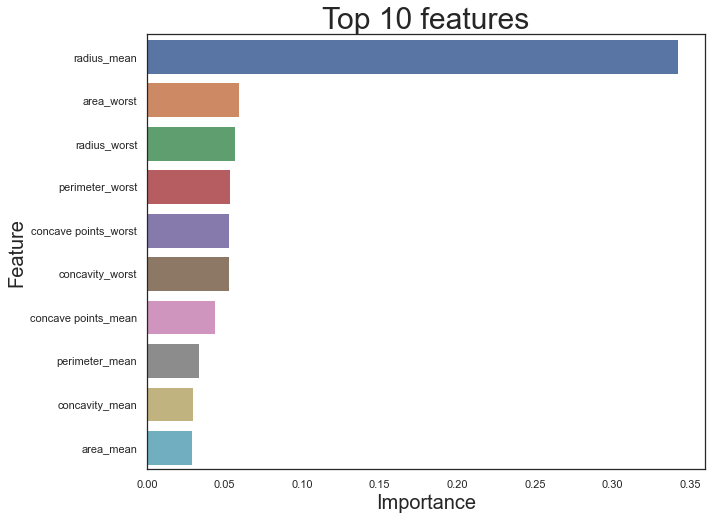

In [37]:
plot_bar(significant_features_data,'Top 10 features', 'top_10_features.jpg')

In [38]:
# Adding diagnosis column in the significant features
significant_feature_columns = significant_features_data.feature.tolist()
significant_feature_columns.insert(0,'diagnosis')
significant_feature_columns

['diagnosis',
 'radius_mean',
 'area_worst',
 'radius_worst',
 'perimeter_worst',
 'concave points_worst',
 'concavity_worst',
 'concave points_mean',
 'perimeter_mean',
 'concavity_mean',
 'area_mean']

In [39]:
final_df = new_data[significant_feature_columns]
final_df.shape
final_df.head()

,diagnosis,radius_mean,area_worst,radius_worst,perimeter_worst,concave points_worst,concavity_worst,concave points_mean,perimeter_mean,concavity_mean,area_mean
0,1.0,0.521037,0.301037,0.33910,0.328167,0.362807,0.418033,0.245670,0.382648,0.316195,0.360927
1,1.0,0.643144,0.301037,0.33910,0.328167,0.362807,0.473547,0.928665,0.382648,0.566937,0.360927
2,1.0,0.601496,0.301037,0.33910,0.328167,0.362807,0.418033,0.245670,0.382648,0.316195,0.360927
3,1.0,0.210090,0.092140,0.32872,0.357472,0.362807,0.418033,0.245670,0.083305,0.316195,0.360927
4,1.0,0.629893,0.301037,0.33910,0.328167,0.362807,0.418033,0.245670,0.382648,0.316195,0.360927


In [40]:
# Creating the csv file from the processed dataframe

final_df.to_csv('../data/new_data.csv',index=False)